# Weight Report

## Weight for this Week

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
def merge_duplicate_dates_in_dataframe(df):
    # Group by the 'date' column and calculate the mean for the 'weightInKg' column
    df_merged = df.groupby('date')['weightInKg'].mean().reset_index()
    
    # Runden Sie die Gewichtswerte auf zwei Nachkommastellen
    df_merged['weightInKg'] = df_merged['weightInKg'].round(2)
    
    return df_merged

def calculate_weekly_averages(df):
    # Convert 'date' column to datetime type
    df['date'] = pd.to_datetime(df['date'])
    
    # Group by the 'date' column and calculate the mean for the 'weightInKg' column
    weekly_averages = df.groupby(pd.Grouper(key='date', freq='W'))['weightInKg'].mean().reset_index()
    
    # Runden Sie die Gewichtswerte auf zwei Nachkommastellen
    weekly_averages['weightInKg'] = weekly_averages['weightInKg'].round(2)
    
    return weekly_averages

    
    return weekly_averages
import matplotlib.pyplot as plt

def plot_weight_loss(df, xlabel, color, title):
    weights = df['weightInKg'].values  # Convert to numpy array
    dates = pd.to_datetime(df['date']).values  # Convert to numpy array

    plt.plot(dates, weights, color)
    plt.xlabel(xlabel)
    plt.ylabel('Weight in kg')
    plt.title(title)

    # Rotate the x-axis tick labels for better visibility
    plt.xticks(rotation=45)
    min_weight = min(weights)
    max_weight = max(weights)
    y_min = min_weight - 5
    y_max = max_weight + 5
    plt.ylim(y_min, y_max)

    # Add labels for each data point
    for i in range(len(dates)):
        plt.text(dates[i], weights[i], f'{weights[i]} kg', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


# Example usage:
current_directory = os.getcwd()
relative_path = 'weight.json'
file_path = os.path.join(current_directory, relative_path)  # Assuming the file is uploaded to this path
with open(file_path, 'r') as file:
    json_data = json.load(file)
# Extract selected data and create a DataFrame
selected_data = [{"weightInKg": entry["weight"], "date": entry["timestamp"]} for entry in json_data]
df = pd.DataFrame(selected_data)

# Convert the 'date' column to datetime objects and format as 'YYYY-MM-DD'
df['date'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m-%d')

# Display the DataFrame
df.head()
# Convert 'weightInKg' column to numeric values
df['weightInKg'] = pd.to_numeric(df['weightInKg'], errors='coerce')
# Filter out rows with NaN values in the 'weightInKg' column
df = df.dropna(subset=['weightInKg'])

# Reset the index of the DataFrame
df.reset_index(drop=True, inplace=True)

# Now, you can proceed with your calculations
daily_averages = merge_duplicate_dates_in_dataframe(df)
weekly_averages = calculate_weekly_averages(daily_averages)




## Daily Weight

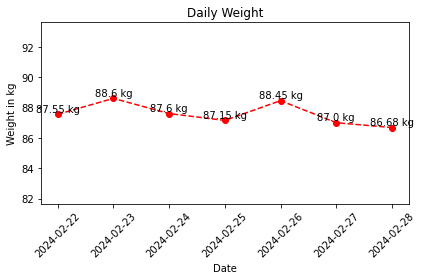

In [16]:
daily_averages =  daily_averages.dropna(subset=['weightInKg'])
daily_averages_tail = daily_averages.tail(7).reset_index(drop=True)
plot_weight_loss(daily_averages_tail, "Date", "ro--", "Daily Weight")


## Weekly Weight

In [17]:
# Reset the index of the DataFrame returned by .tail()
weekly_averages =  weekly_averages.dropna(subset=['weightInKg'])
weekly_averages_tail = weekly_averages.tail(7).reset_index(drop=True)
weekly_averages_tail

,date,weightInKg
0,2024-01-21,87.72
1,2024-01-28,87.37
2,2024-02-04,87.37
3,2024-02-11,88.32
4,2024-02-18,88.20
5,2024-02-25,88.06
6,2024-03-03,87.38


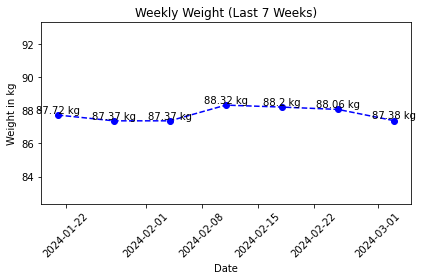

In [18]:


# Call the plot_weight_loss function with the modified DataFrame
plot_weight_loss(weekly_averages_tail, "Date", "bo--", "Weekly Weight (Last 7 Weeks)")


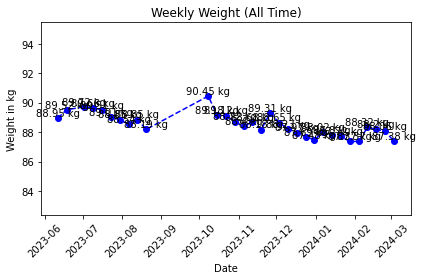

In [19]:


# Call the plot_weight_loss function with the modified DataFrame
plot_weight_loss(weekly_averages, "Date", "bo--", "Weekly Weight (All Time)")
